In [1]:
import os
import glob
import pandas as pd
from utils import *
from eeg import *
from et_qc import *
from ecg_qc import *
from eda_qc import *
from rsp_qc import *
from mic_qc import *
from webcam_qc import *
from behavior_qc import *



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/anaconda3/envs/cuny_qc/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/anaconda3/envs/cuny_qc/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/anaconda3/envs/cuny_qc/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

## Get file path and subject ID

In [20]:
pathname = "/Users/apurva.gokhe/Documents/CUNY_QC/data/sub-P5597531/*.xdf"
subject = glob(pathname)
subject_id = subject[0].split('-')[1].split('/')[0]
subject_id

'P5597531'

## Run QC for all modalities (for 1 subject)

### EEG

In [ ]:
eeg_vars = compute_eeg_pipeline(subject[0])
eeg_vars = {f"eeg_{key}": value for key, value in eeg_vars.items()}
eeg_vars

### Eye Tracking

In [ ]:
et_vars = et_qc(subject[0])
et_vars = {f"et_{key}": value for key, value in et_vars.items()}
et_vars

### ECG

In [ ]:
ecg_vars, _ = ecg_qc(subject[0])
ecg_vars = {f"ecg_{key}": value for key, value in ecg_vars.items()}
ecg_vars

### EDA

Effective sampling rate: 599.558 Hz
Signal Integrity Check: 100.000 %
Average Skin Conductance Level: 6.364 mS
Skin Conductance Level Standard deviation: 0.984 mS
Skin Conductance Level Coefficient of Variation: 15.457 %
Average Amplitude of Skin Conductance Response: 0.837 mS
Skin Conductance Response Validity: 100.000 %
Signal to Noise Ratio: 48.325 dB


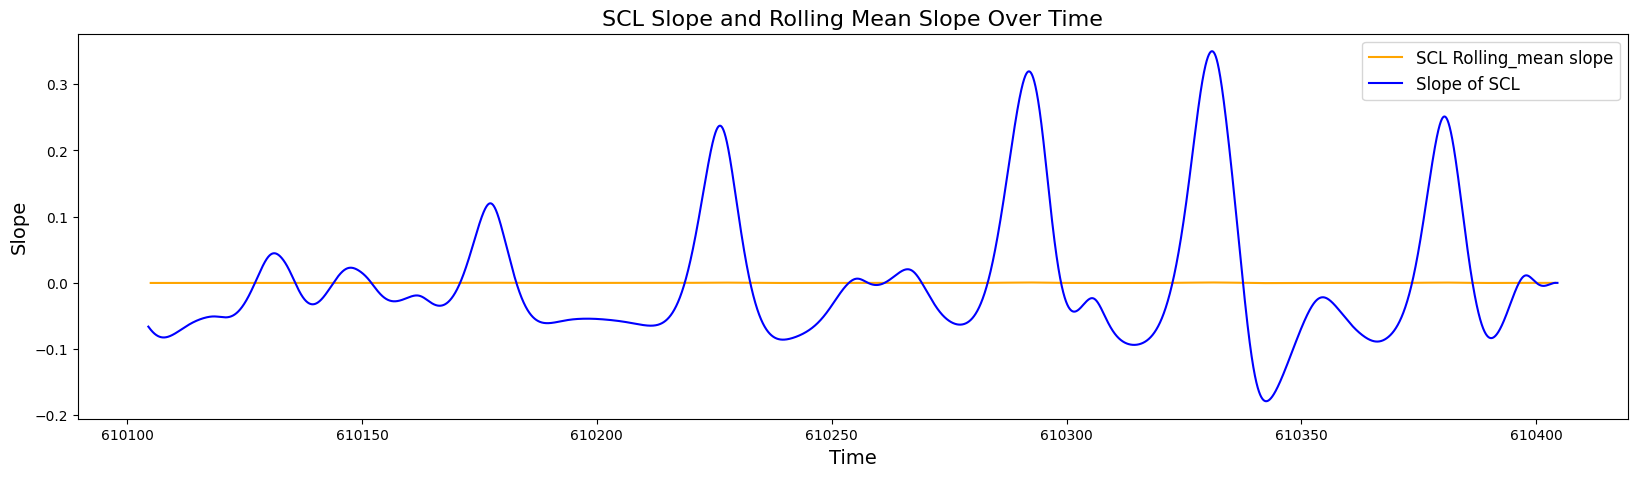

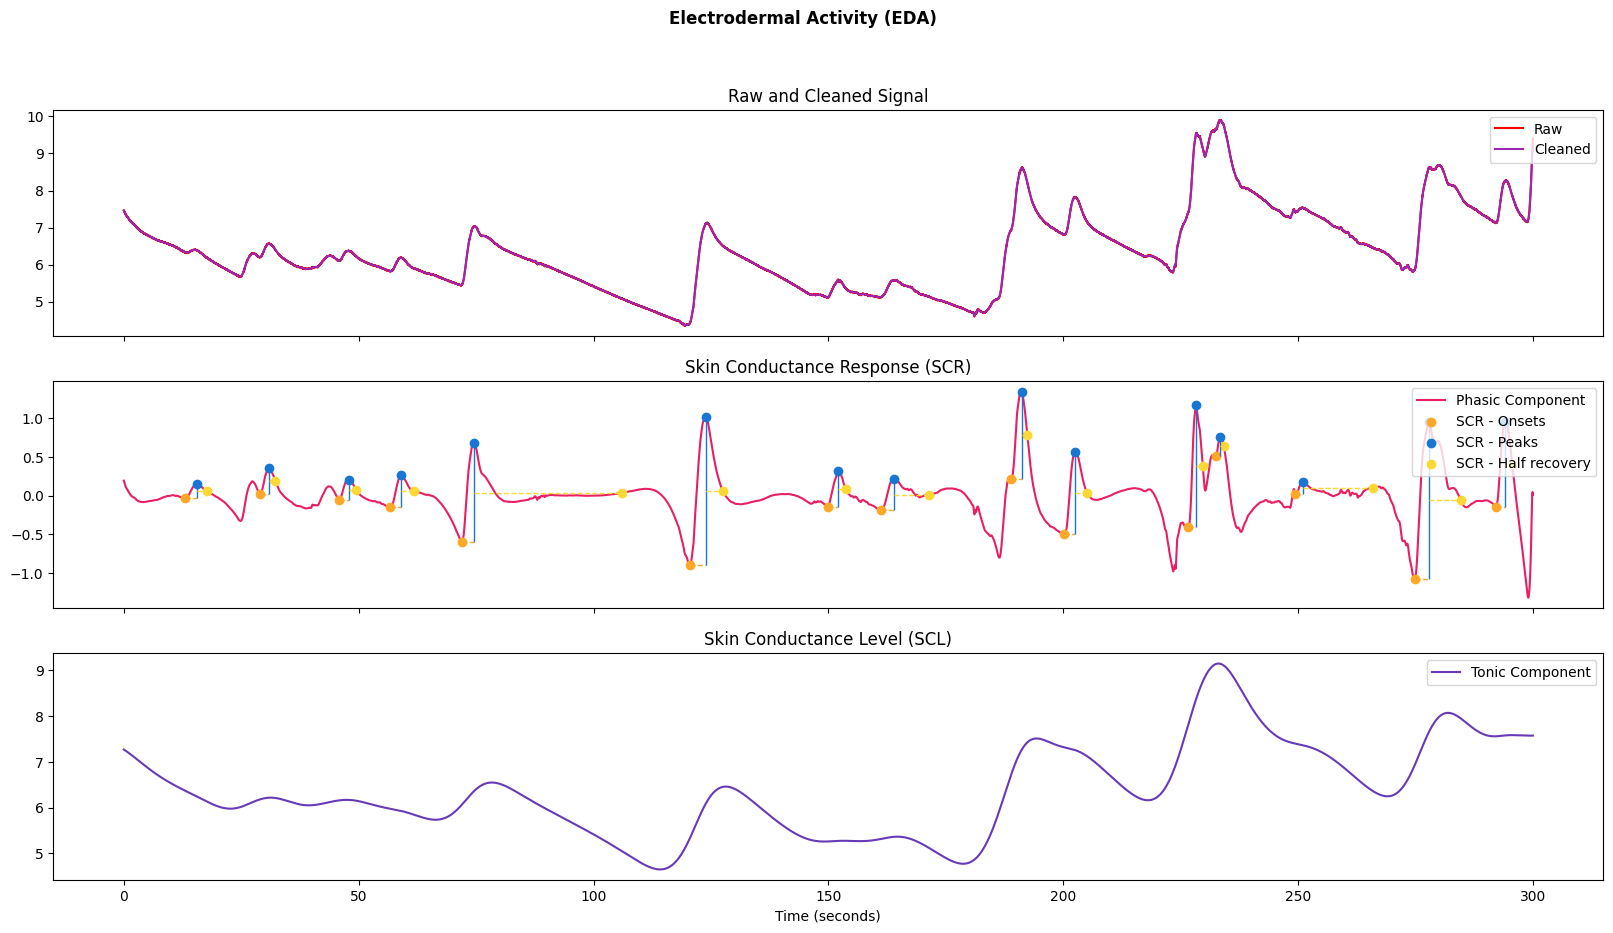

{'eda_sampling_rate': 599.5584586162964,
 'eda_signal_integrity_check': 100.0,
 'eda_average_scl': np.float64(6.363666459871822),
 'eda_scl_sd': 0.983603531351177,
 'eda_scl_cv': np.float64(15.456553820876856),
 'eda_average_scr_amplitude': np.float64(0.8373497815284203),
 'eda_sc_validity': 100.0,
 'eda_snr': np.float64(48.324833535179124)}

In [28]:
eda_vars, _, _ = eda_qc(subject[0])
eda_vars = {f"eda_{key}": value for key, value in eda_vars.items()}
eda_vars

### RSP

In [ ]:
rsp_vars = rsp_qc(subject[0])
rsp_vars = {f"rsp_{key}": value for key, value in rsp_vars.items()}
rsp_vars

### Mic

In [ ]:
mic_vars = mic_qc(subject[0])
mic_vars = {f"mic_{key}": value for key, value in mic_vars.items()}
mic_vars

### Webcam

In [ ]:
webcam_vars = webcam_qc(subject[0])
webcam_vars = {f"webcam_{key}": value for key, value in webcam_vars.items()}
webcam_vars

### Behavior

In [ ]:
behavior_vars = behavior_qc(subject[0])
behavior_vars = {f"behavior_{key}": value for key, value in behavior_vars.items()}
behavior_vars

## Generate dataframe with all qc metrics for all modalities (for 1 subject)

In [32]:
export_csv = {'Subject': subject_id}
export_csv.update(eeg_vars)
export_csv.update(et_vars)
export_csv.update(ecg_vars)
export_csv.update(eda_vars)
export_csv.update(rsp_vars)
export_csv.update(mic_vars)
export_csv.update(webcam_vars)
export_csv.update(behavior_vars)
export_csv_df = pd.DataFrame([export_csv])
export_csv_df

NameError: name 'eeg_vars' is not defined

## Generate csv

## Update csv to show qc metrics for other subjects